In [1]:
import random as rn
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Share Generation 

# Generation Of coefficients: [A0,A1,...At-1]
    
    (A1,A2,..,At-1) randomly from Zp 
     A0 is appended at the front where A0 is the message

In [2]:
def GenCoeff(message,t,p_val=251):   # p_val : prime number for Zp_val
    coeff = []
    coeff.append(message)     # Ao value (the secret)
    for i in range((t-1)): 
        coeff.append(rn.randint(0,p_val) % p_val)  # A1 to At-1 : random value from Zp_val
    return coeff 

In [3]:
GenCoeff(1,4,p_val=5)  # degree (t-1) : 4-1 = 3 ; A0 = 97 ; A1 for (x) = random , A2 for (x^2) = random , A3 for (X^3) = random

[1, 3, 4, 0]

# Polynomial Evaluation

In [4]:
def GenPoly(x, coeff,p_val=251):
    f_x = 0
    for index, value in enumerate(coeff):
        f_x += x ** index * value
    return (f_x % p_val)

In [5]:
coeff = [2,2,3]                # the coeff list must contain the secret
f_x1 = GenPoly(1,coeff,5)      # (1*  1^0 + 2*  1^1 + 3*  1^2) mod 5 = (1 + 2 + 3)  mod 5 = 6  mod 5 = 1
f_x2 = GenPoly(2,coeff,5)      # (1*  2^0 + 2*  2^1 + 3*  2^2) mod 5 = (1 + 4 + 12) mod 5 = 17 mod 5 = 2
f_x3 = GenPoly(3,coeff,5)      # (1*  3^0 + 2*  3^1 + 3*  3^2) mod 5 = (1 + 6 + 27) mod 5 = 34 mod 5 = 4
f_x4 = GenPoly(4,coeff,5)      # (1*  4^0 + 2*  4^1 + 3*  4^2) mod 5 = (1 + 8 + 48) mod 5 = 57 mod 5 = 2
print(f_x1,f_x2,f_x3,f_x4) 

2 3 0 3


# Share Generation Algorithm

In [6]:
def ShareGen(t,w,message,p_val=251):
    c = GenCoeff(message, t , p_val)
    #print(c)
    Shares = []
 
    for x in range(1, w+1):
        f_x = GenPoly(x, c, p_val)
        Shares.append((x,f_x))
 
    return Shares

In [7]:
Shares = ShareGen(t=3,w=5,message=3,p_val=5)
Shares

[(1, 2), (2, 1), (3, 0), (4, 4), (5, 3)]

# Explanation of the ShareGen results above

       example scenario:
               
       coefficeints = [message(A0) , A1 , A2] : [3, 0, 4]
       t = 3 ; so degree = t-1 = 2 ; w = 4 so 4 shares ; p = 5
       
       f(x) = (A0* x^0 + A1* x^1 + A2 * x^2) mod p

       Share1 = f(1) : (3*  1^0 + 0*  1^1 + 4*  1^2) mod 5 = (3 + 0 + 4)  mod 5 = 7  mod 5 = 2
       Share2 = f(2) : (3*  2^0 + 0*  2^1 + 4*  2^2) mod 5 = (3 + 0 + 16) mod 5 = 19 mod 5 = 4
       Share3 = f(3) : (3*  3^0 + 0*  3^1 + 4*  3^2) mod 5 = (3 + 0 + 36) mod 5 = 39 mod 5 = 4
       Share4 = f(4) : (3*  4^0 + 0*  4^1 + 4*  4^2) mod 5 = (3 + 0 + 64) mod 5 = 67 mod 5 = 2

# Reconstrution Algorithm 

        f(x) = (A0* x^0 + A1* x^1 + A2 * x^2) mod p

        Share1 = f(1) : (3*  1^0 + 0*  1^1 + 4*  1^2) mod 5 = (3 + 0 + 4)  mod 5 = 7  mod 5 = 2
        Share2 = f(2) : (3*  2^0 + 0*  2^1 + 4*  2^2) mod 5 = (3 + 0 + 16) mod 5 = 19 mod 5 = 4
        Share3 = f(3) : (3*  3^0 + 0*  3^1 + 4*  3^2) mod 5 = (3 + 0 + 36) mod 5 = 39 mod 5 = 4
        Share4 = f(4) : (3*  4^0 + 0*  4^1 + 4*  4^2) mod 5 = (3 + 0 + 64) mod 5 = 67 mod 5 = 2
            
            this can be re written as :
                f(1) = 2 = [[A0]       [[1^0 1^1 1^2]
                f(2) = 4 =  [A1]  *     [2^0 2^1 2^2]    mod P
                f(3) = 4 =  [A2]]       [3^0 3^1 3^2]]
                        
                 The above system of equations can be written as :       
                    
                                                                 [[1^0 1^1 1^2]
                 [ A0  A1  A2 ] = [f(1) f(2) f(3)]  *  inverse(   [2^0 2^1 2^2] mod P ) . Transpose
                                                                  [3^0 3^1 3^2]]
                        
                 Our Goal is to find [ A0  A1  A2 ] ; where A0 is our original message/secret
                
               [[1^0 1^1 1^2]
                [2^0 2^1 2^2]   : this is called a Vandermonde matrix and for such matrix |A| != 0 always
                [3^0 3^1 3^2]]    hence inverse of such matrix always exists.
            
            we need to find modular inverse of matrix hence we need a mod inverse function(with respect to Zp) ,
            which uses the concept of the eucledian algorithm to find the gcd
            
            
# Rough Work

# Trying to create a Vandermonde matrix

In [8]:
w = 4
t = 3

x = list(range(1,w+1))
print(x)

[1, 2, 3, 4]


In [9]:
vanMat = np.vander(x,t,increasing=True)
vanMat

array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  4, 16]])

In [10]:
s = [(1, 2), (2, 3), (3, 0)]  # message = 3

if len(s) < t :
    print("Insufficients Shares provided...\nCannot Generate Original Message")
    
else:
    X = []
    f_x = []
    for i in s:
        X.append(i[0])
        f_x.append(i[1])
    
    print(X,f_x)

[1, 2, 3] [2, 3, 0]


In [11]:
vanMat = np.vander(X,t,increasing=True)
vanMat = vanMat % 5
vanMat

array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 4]], dtype=int32)

# Eucledian GCD and modular Inverse Function

In [12]:
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    g, y, x = egcd(b%a,a)
    return (g, x - (b//a) * y, y)

In [13]:
def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('No modular inverse')
    return x%m

# Function to find the inverse of a matrix modulo n

In [14]:
def inversematrix(matrix, q):
    n = len(matrix)
    A = np.matrix([[ matrix[j, i] for i in range(0,n)] for j in range(0, n)],dtype=int)
    #print(A)
    Ainv = np.identity(n,dtype=int)
    for i in range(0, n):
        factor = modinv(A[i,i], q)
        A[i] = (A[i] * factor) % q
        Ainv[i] = (Ainv[i] * factor) % q
        for j in range(0, n):
            if (i != j):
                factor = A[j, i]
                A[j] = (A[j] - factor * A[i]) % q
                Ainv[j] = (Ainv[j] - factor * Ainv[i]) % q
    return Ainv

In [15]:
vanMatInv = inversematrix(vanMat,5)
vanMatInv

array([[3, 2, 1],
       [0, 4, 1],
       [3, 4, 3]])

In [16]:
co_eff = np.matmul(f_x,vanMatInv.T)
print(co_eff)
co_eff % 5

[12 12 18]


array([2, 2, 3], dtype=int32)

# Reconstruction Algorithm

In [17]:
# Shares : list of tupples , each tupple correspponds to a share
# t : minimum number of shares required to reconstrcut the origianl message
# p_val : a prime number = max(w,message) for Zp , from which the coefficients are randomly selected

def ReconstructSecret(Shares , t , P_val=251):
    
    if len(Shares) < t :
        print("Insufficients Shares provided...\nCannot Generate Original Message\nExiting Reconstruction...")
        return
    
    X = []
    f_x = []
    c=1
    for i in Shares:
        X.append(i[0])
        f_x.append(i[1])
        c+=1
        if c>t:
            break
        
        
    vanMat = np.vander(X,t,increasing=True)
    vanMat = vanMat % P_val
    #print(vanMat)
    vanMatInv = inversematrix(vanMat,P_val)
    #print(vanMatInv)
    co_eff = np.matmul(f_x,vanMatInv.T)
    co_eff = co_eff % P_val
    
    return co_eff[0]

# (T,W) Secret Sharing Scheme :

In [18]:
def fexp(x,e,m): #x^e % m

    X = x
    E = e
    Y = 1
    while E > 0:
        if E % 2 == 0:
            X = (X * X) % m
            E = E/2
        else:
            Y = (X * Y) % m
            E = E - 1
    return Y

In [19]:
def primeorNot(n):
     #trival cases
    if n == 1 or n == 4:
        return False
    elif n == 2 or n == 3:
        return True
    else:
        for i in range(3):

            # Pick a random number
            # in [2..n-2]     
            # Above corner cases make
            # sure that n > 4
            a = rn.randint(2, n - 2)

            # Fermat's little theorem
            if fexp(a, n - 1, n) != 1:
                return False

    return True

In [20]:
def nextPrime(n):
    if n< 0:
        prime = None
        print("\nPlease enter a number greater than 0...")
        return prime
    
    if n == 1 or n == 0:
        return 2
 
    prime = n
 
    while(1):
        prime = prime + 1
        if(primeorNot(prime) == True):
            break
 
    return prime

In [21]:
def accept():
    m = int(input("Enter Your Message :"))
    w = int(input("Enter total number of shares needed to be generated :"))
    t = int(input("Enter minimum number of shares required to unlock secret :"))
    
    p = max(w,m)
    p = nextPrime(p)
    
    return m,t,w,p

# (t,w) Secret sharing demo :

In [22]:
message , t , w , P_val = accept()

Enter Your Message :1983
Enter total number of shares needed to be generated :7
Enter minimum number of shares required to unlock secret :5


In [23]:
print("Secret : {}\nMinimum Shares to unlock(t) : {}\nTotal Shares(w) : {}\np_val for Zp : {}".format(message , t , w , P_val))

Secret : 1983
Minimum Shares to unlock(t) : 5
Total Shares(w) : 7
p_val for Zp : 1987


In [24]:
Shares = ShareGen(t=t,w=w,message=message,p_val=P_val)
print("\nGenerting Shares...\n{}\nShares Generated...".format(Shares))



Generting Shares...
[(1, 373), (2, 1091), (3, 328), (4, 999), (5, 821), (6, 261), (7, 549)]
Shares Generated...


In [26]:
ip_share = [(1, 373), (3, 328), (4, 999), (5, 821),(7, 549)]
Reconstructed_Secret = ReconstructSecret(ip_share,t,P_val)
print("Reconstrcuted Secret :\t",Reconstructed_Secret)

Reconstrcuted Secret :	 1983


# Image enryption using secret Sharing Scheme:

# Image Encryption Algorithm:

In [27]:
def acceptImg():
    img = input("\nEnter Image path :")
    w = int(input("\nEnter total number of shares needed to be generated :"))
    t = int(input("\nEnter minimum number of shares required to unlock Image :"))
    
    return img,w,t

In [28]:
def ImageEncrypt():
    image , w,t = acceptImg()
    img = cv2.imread(image, 0)
    img = cv2.resize(img,(160,160))
    
    print("\nDisplaying original Image :")
    plt.figure()
    plt.imshow(img,cmap='gray')
    plt.show()
    
    img_arr = img.flatten()
    for index,pix in enumerate(img_arr):
        if pix>250:
            img_arr[index] = 250
    
    share_dict ={}
    for i in range(1,w+1):
        share_dict[i]=[]
        
    for index,value in enumerate(img_arr):
        Shares = ShareGen(t,w,value)
        for indx,val in enumerate(Shares):
            share_dict[indx+1].append(val[1])
            
    print("\nGenerating Shares...")      
    for key,val in share_dict.items():
        shareimg = np.array(val,dtype=int)
        shareimg1 = shareimg.reshape(160,160)
        cv2.imwrite('Share_{}.jpg'.format(key),shareimg1)
        print('\nShare_{}.jpg'.format(key))
        plt.figure()
        plt.imshow(shareimg1,cmap='gray')
        plt.show()
        print("\nShare : {} saved as Share_{}.jpg in current working directory".format(key,key))
       

# Image Reconstruction Algorithm:

In [29]:
def ReconstructImage(Imgshares,t):
    img_ar = []
    for i in Imgshares:
        temp = cv2.imread(i, 0)
        temp1 = temp.flatten()
        img_ar.append(temp1)

    img_ar = np.array(img_ar,dtype=int)
    img_ar = img_ar.T
    
    Recons = []
    c=0
    for i in img_ar:
        S=[]
        for index,val in enumerate(i):
            x = Imgshares[index]
            x = x.split('.')[0]
            x = x.split('_')[1]
            S.append((int(x),val))
            #print((int(x),val))
#         print(S)
#         print("Done")
        original = ReconstructSecret(S,t)
        if original == None:
            return 
        Recons.append(original)
        c+=1
    print(c)
    Recons = np.array(Recons,dtype=int)
    Recons = Recons.reshape(160,160)
    print("Unlocking Image\nDisplaying Unlocked Image...")
    plt.imshow(Recons,cmap='gray')
    cv2.imwrite('ReconsImg.jpg',Recons)
    print("\nImage saved in current working director as ReconsImg.jpg...")
    

# Visual Crypto Demo:


Enter Image path :Sample.jpg

Enter total number of shares needed to be generated :4

Enter minimum number of shares required to unlock Image :2

Displaying original Image :


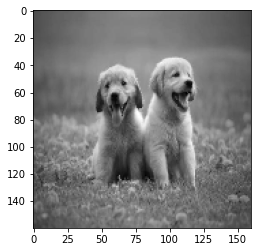


Generating Shares...

Share_1.jpg


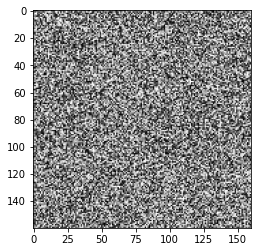


Share : 1 saved as Share_1.jpg in current working directory

Share_2.jpg


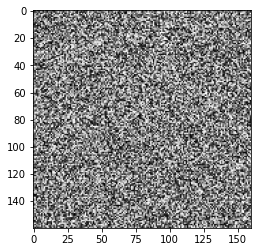


Share : 2 saved as Share_2.jpg in current working directory

Share_3.jpg


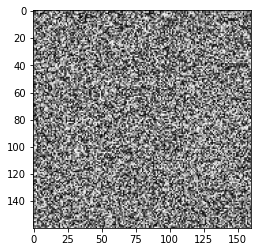


Share : 3 saved as Share_3.jpg in current working directory

Share_4.jpg


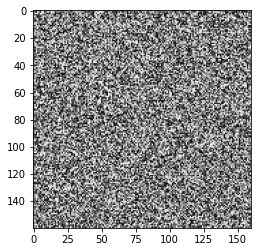


Share : 4 saved as Share_4.jpg in current working directory


In [30]:
ImageEncrypt()

25600
Unlocking Image
Displaying Unlocked Image...

Image saved in current working director as ReconsImg.jpg...


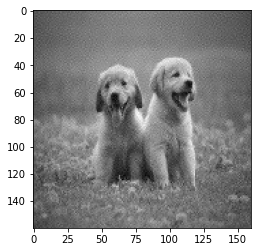

In [32]:
Imgshares = ['Share_2.jpg','Share_3.jpg'] #Enter name of Shares of original Image
ReconstructImage(Imgshares=Imgshares,t=2)